In [34]:
import os
import surprise
from surprise import Reader, Dataset, GridSearch, accuracy,  SVD, SVDpp, NMF, BaselineOnly, evaluate, KNNWithZScore, KNNWithMeans, KNNBasic
import numpy as np

#for sample_700
file_path = os.path.expanduser('/Users/lamba_s/Desktop/personalization-theory-master/sample_700.csv')
reader = Reader(line_format='user item rating', sep=',')
data0 = Dataset.load_from_file(file_path, reader=reader)

#for sample_1400
file_path = os.path.expanduser('/Users/lamba_s/Desktop/personalization-theory-master/sample_1400.csv')
reader = Reader(line_format='user item rating', sep=',')
data1 = Dataset.load_from_file(file_path, reader=reader)

#for sample_2100
file_path = os.path.expanduser('/Users/lamba_s/Desktop/personalization-theory-master/sample_2100.csv')
reader = Reader(line_format='user item rating', sep=',')
data2 = Dataset.load_from_file(file_path, reader=reader)

#for sample_full
file_path = os.path.expanduser('/Users/lamba_s/Desktop/personalization-theory-master/sampled_data.csv')
reader = Reader(line_format='user item rating', sep=',')
data3 = Dataset.load_from_file(file_path, reader=reader)

data = [data0, data1, data2, data3]



In [22]:
import time

def running_time(elapsedtime_SVDtrain, elapsedtime_SVDtest, n_factors, n_epochs, data):
    for i in range(len(data)):
        startTime = time.time()
        training = data[i].build_full_trainset()
        testing = training.build_anti_testset()
        svd = SVD(n_factors=n_factors, n_epochs=n_epochs)
        svd.train(training)
        elapsedtime_SVDtrain.append(time.time() - startTime)
        
        startTime = time.time()
        predictions = svd.test(testing)
        svd_rmse = accuracy.rmse(predictions, verbose=True)
        elapsedtime_SVDtest.append(time.time() - startTime)
    return elapsedtime_SVDtrain, elapsedtime_SVDtest

In [23]:
elapsedtime_SVDtrain = []
elapsedtime_SVDtest = []
param_grid = {'n_factors': [25, 50, 100, 250], 'n_epochs': [10, 20, 30, 40, 50]}
grid_search = GridSearch(SVD, param_grid, measures=['RMSE'], verbose=False)
grid_search.evaluate(data[3])
param = grid_search.best_params['RMSE']

elapsedtime_SVD = running_time(elapsedtime_SVDtrain, elapsedtime_SVDtest, param['n_factors'],param['n_epochs'], data)
print(elapsedtime_SVD)

[{'n_factors': 25, 'n_epochs': 10}, {'n_factors': 25, 'n_epochs': 20}, {'n_factors': 25, 'n_epochs': 30}, {'n_factors': 25, 'n_epochs': 40}, {'n_factors': 25, 'n_epochs': 50}, {'n_factors': 50, 'n_epochs': 10}, {'n_factors': 50, 'n_epochs': 20}, {'n_factors': 50, 'n_epochs': 30}, {'n_factors': 50, 'n_epochs': 40}, {'n_factors': 50, 'n_epochs': 50}, {'n_factors': 100, 'n_epochs': 10}, {'n_factors': 100, 'n_epochs': 20}, {'n_factors': 100, 'n_epochs': 30}, {'n_factors': 100, 'n_epochs': 40}, {'n_factors': 100, 'n_epochs': 50}, {'n_factors': 250, 'n_epochs': 10}, {'n_factors': 250, 'n_epochs': 20}, {'n_factors': 250, 'n_epochs': 30}, {'n_factors': 250, 'n_epochs': 40}, {'n_factors': 250, 'n_epochs': 50}]
RMSE: 0.4240
RMSE: 0.4408
RMSE: 0.4258
RMSE: 0.4209
([0.2751750946044922, 0.7887601852416992, 0.9550511837005615, 1.372892141342163], [1.0675861835479736, 2.140303134918213, 3.0797500610351562, 4.444240093231201])


In [24]:
import time

def running_time(elapsedtime_SVDpptrain, elapsedtime_SVDpptest, n_factors, n_epochs, data):
    for i in range(len(data)):
        startTime = time.time()
        training = data[i].build_full_trainset()
        testing = training.build_anti_testset()
        svdpp = SVDpp(n_factors=n_factors, n_epochs=n_epochs)
        svdpp.train(training)
        elapsedtime_SVDpptrain.append(time.time() - startTime)
        
        startTime = time.time()
        predictions = svdpp.test(testing)
        svdpp_rmse = accuracy.rmse(predictions, verbose=True)
        elapsedtime_SVDpptest.append(time.time() - startTime)
    return elapsedtime_SVDpptrain, elapsedtime_SVDpptest

In [25]:
elapsedtime_SVDpptrain = []
elapsedtime_SVDpptest = []
param_grid = {'n_factors': [25, 50, 100, 250], 'n_epochs': [10, 20, 30, 40, 50]}
grid_search = GridSearch(SVD, param_grid, measures=['RMSE'], verbose=False)
grid_search.evaluate(data[3])
param = grid_search.best_params['RMSE']

elapsedtime_SVDpp = running_time(elapsedtime_SVDpptrain, elapsedtime_SVDpptest, param['n_factors'],param['n_epochs'], data)
print(elapsedtime_SVDpp)

[{'n_factors': 25, 'n_epochs': 10}, {'n_factors': 25, 'n_epochs': 20}, {'n_factors': 25, 'n_epochs': 30}, {'n_factors': 25, 'n_epochs': 40}, {'n_factors': 25, 'n_epochs': 50}, {'n_factors': 50, 'n_epochs': 10}, {'n_factors': 50, 'n_epochs': 20}, {'n_factors': 50, 'n_epochs': 30}, {'n_factors': 50, 'n_epochs': 40}, {'n_factors': 50, 'n_epochs': 50}, {'n_factors': 100, 'n_epochs': 10}, {'n_factors': 100, 'n_epochs': 20}, {'n_factors': 100, 'n_epochs': 30}, {'n_factors': 100, 'n_epochs': 40}, {'n_factors': 100, 'n_epochs': 50}, {'n_factors': 250, 'n_epochs': 10}, {'n_factors': 250, 'n_epochs': 20}, {'n_factors': 250, 'n_epochs': 30}, {'n_factors': 250, 'n_epochs': 40}, {'n_factors': 250, 'n_epochs': 50}]
RMSE: 0.4434
RMSE: 0.4448
RMSE: 0.4345
RMSE: 0.4310
([0.5537760257720947, 1.1558079719543457, 1.717177152633667, 2.4216208457946777], [1.7267329692840576, 4.07784104347229, 6.536037921905518, 9.414973974227905])


In [26]:
import time

def running_time(elapsedtime_NMFtrain, elapsedtime_NMFtest, n_factors, n_epochs, data):
    for i in range(len(data)):
        startTime = time.time()
        training = data[i].build_full_trainset()
        testing = training.build_anti_testset()
        nmf = NMF(n_factors=n_factors, n_epochs=n_epochs)
        nmf.train(training)
        elapsedtime_NMFtrain.append(time.time() - startTime)
        
        startTime = time.time()
        predictions = nmf.test(testing)
        svdpp_rmse = accuracy.rmse(predictions, verbose=True)
        elapsedtime_NMFtest.append(time.time() - startTime)
    return elapsedtime_NMFtrain, elapsedtime_NMFtest

In [27]:
elapsedtime_NMFtrain = []
elapsedtime_NMFtest = []
param_grid = {'n_factors': [45, 50, 55, 60], 'n_epochs': [45, 50, 55]}
grid_search = GridSearch(NMF, param_grid, measures=['RMSE'], verbose=False)
grid_search.evaluate(data[3])
param = grid_search.best_params['RMSE']

elapsedtime_NMF = running_time(elapsedtime_NMFtrain, elapsedtime_NMFtest, param['n_factors'],param['n_epochs'], data)
print(elapsedtime_NMF)

[{'n_factors': 45, 'n_epochs': 45}, {'n_factors': 45, 'n_epochs': 50}, {'n_factors': 45, 'n_epochs': 55}, {'n_factors': 50, 'n_epochs': 45}, {'n_factors': 50, 'n_epochs': 50}, {'n_factors': 50, 'n_epochs': 55}, {'n_factors': 55, 'n_epochs': 45}, {'n_factors': 55, 'n_epochs': 50}, {'n_factors': 55, 'n_epochs': 55}, {'n_factors': 60, 'n_epochs': 45}, {'n_factors': 60, 'n_epochs': 50}, {'n_factors': 60, 'n_epochs': 55}]
RMSE: 1.1392
RMSE: 1.1948
RMSE: 1.2213
RMSE: 1.2053
([0.3129730224609375, 0.6835670471191406, 1.1254138946533203, 1.6064789295196533], [0.6787300109863281, 2.09791898727417, 3.466615915298462, 4.438836097717285])


In [28]:
import time

def running_time(elapsedtime_Basetrain, elapsedtime_Basetest, data):
    for i in range(len(data)):
        startTime = time.time()
        training = data[i].build_full_trainset()
        testing = training.build_anti_testset()
        baseline = BaselineOnly()
        baseline.train(training)
        elapsedtime_Basetrain.append(time.time() - startTime)
        
        startTime = time.time()
        predictions = baseline.test(testing)
        Baseline_rmse = accuracy.rmse(predictions, verbose=True)
        elapsedtime_Basetest.append(time.time() - startTime)
    return elapsedtime_Basetrain, elapsedtime_Basetest

In [29]:
elapsedtime_Basetrain = []
elapsedtime_Basetest = []

elapsedtime_Baseline = running_time(elapsedtime_Basetrain, elapsedtime_Basetest, data)
print(elapsedtime_Baseline)

Estimating biases using als...
RMSE: 0.2759
Estimating biases using als...
RMSE: 0.3069
Estimating biases using als...
RMSE: 0.2972
Estimating biases using als...
RMSE: 0.3075
([0.13741302490234375, 0.3323800563812256, 0.515064001083374, 0.8221848011016846], [0.7767589092254639, 1.7409601211547852, 2.601158857345581, 4.1640050411224365])


In [39]:
import time

def running_time(elapsedtime_KnnBasictrain, elapsedtime_KnnBasictest, k, sim, min_support, user_based, data):
    for i in range(len(data)):
        startTime = time.time()
        training = data[i].build_full_trainset()
        testing = training.build_anti_testset()
        knn = KNNBasic(k=k, name=sim, min_support=min_support, user_based=user_based )
        knn.train(training)
        elapsedtime_KnnBasictrain.append(time.time() - startTime)
        
        startTime = time.time()
        predictions = knn.test(testing)
        KnnBasic_rmse = accuracy.rmse(predictions, verbose=True)
        elapsedtime_KnnBasictest.append(time.time() - startTime)
    return elapsedtime_KnnBasictrain, elapsedtime_KnnBasictest

In [40]:
elapsedtime_KnnBasictrain = []
elapsedtime_KnnBasictest = []
param_grid = {'k': [5, 10, 20], 'sim_options': {'name': ['msd', 'cosine', 'pearson'],
                                                        'min_support': [1, 5], 'user_based': [False]}}
grid_search = GridSearch(KNNBasic, param_grid, measures=['RMSE'], verbose=False)
grid_search.evaluate(data3)
param = grid_search.best_params['RMSE']

elapsedtime_KnnBasic = running_time(elapsedtime_KnnBasictrain, elapsedtime_KnnBasictest, param['k'],param['sim_options']['name'], param['sim_options']['min_support'], param['sim_options']['user_based'], data)
print(elapsedtime_KnnBasic)

[{'sim_options': {'min_support': 1, 'name': 'msd', 'user_based': False}, 'k': 5}, {'sim_options': {'min_support': 1, 'name': 'msd', 'user_based': False}, 'k': 10}, {'sim_options': {'min_support': 1, 'name': 'msd', 'user_based': False}, 'k': 20}, {'sim_options': {'min_support': 5, 'name': 'msd', 'user_based': False}, 'k': 5}, {'sim_options': {'min_support': 5, 'name': 'msd', 'user_based': False}, 'k': 10}, {'sim_options': {'min_support': 5, 'name': 'msd', 'user_based': False}, 'k': 20}, {'sim_options': {'min_support': 1, 'name': 'cosine', 'user_based': False}, 'k': 5}, {'sim_options': {'min_support': 1, 'name': 'cosine', 'user_based': False}, 'k': 10}, {'sim_options': {'min_support': 1, 'name': 'cosine', 'user_based': False}, 'k': 20}, {'sim_options': {'min_support': 5, 'name': 'cosine', 'user_based': False}, 'k': 5}, {'sim_options': {'min_support': 5, 'name': 'cosine', 'user_based': False}, 'k': 10}, {'sim_options': {'min_support': 5, 'name': 'cosine', 'user_based': False}, 'k': 20}, {

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.5429
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.5029
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.5185
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.5047
([0.2013568878173828, 0.38406991958618164, 0.6953508853912354, 1.0711920261383057], [2.448745012283325, 5.8849968910217285, 10.62440800666809, 20.145408153533936])


In [41]:
import time

def running_time(elapsedtime_KnnMeanstrain, elapsedtime_KnnMeanstest, k, sim, min_support, user_based, data):
    for i in range(len(data)):
        startTime = time.time()
        training = data[i].build_full_trainset()
        testing = training.build_anti_testset()
        knnm = KNNWithMeans(k=k, name=sim, min_support=min_support, user_based=user_based )
        knnm.train(training)
        elapsedtime_KnnMeanstrain.append(time.time() - startTime)
        
        startTime = time.time()
        predictions = knnm.test(testing)
        KnnMeans_rmse = accuracy.rmse(predictions, verbose=True)
        elapsedtime_KnnMeanstest.append(time.time() - startTime)
    return elapsedtime_KnnMeanstrain, elapsedtime_KnnMeanstest

In [42]:
elapsedtime_KnnMeanstrain = []
elapsedtime_KnnMeanstest = []
param_grid = {'k': [5, 10, 20], 'sim_options': {'name': ['msd', 'cosine', 'pearson'],
                                                        'min_support': [1, 5], 'user_based': [False]}}
grid_search = GridSearch(KNNWithMeans, param_grid, measures=['RMSE'], verbose=False)
grid_search.evaluate(data3)
param = grid_search.best_params['RMSE']

elapsedtime_KnnM = running_time(elapsedtime_KnnMeanstrain, elapsedtime_KnnMeanstest, param['k'],param['sim_options']['name'], param['sim_options']['min_support'], param['sim_options']['user_based'], data)
print(elapsedtime_KnnM)

[{'sim_options': {'min_support': 1, 'name': 'msd', 'user_based': False}, 'k': 5}, {'sim_options': {'min_support': 1, 'name': 'msd', 'user_based': False}, 'k': 10}, {'sim_options': {'min_support': 1, 'name': 'msd', 'user_based': False}, 'k': 20}, {'sim_options': {'min_support': 5, 'name': 'msd', 'user_based': False}, 'k': 5}, {'sim_options': {'min_support': 5, 'name': 'msd', 'user_based': False}, 'k': 10}, {'sim_options': {'min_support': 5, 'name': 'msd', 'user_based': False}, 'k': 20}, {'sim_options': {'min_support': 1, 'name': 'cosine', 'user_based': False}, 'k': 5}, {'sim_options': {'min_support': 1, 'name': 'cosine', 'user_based': False}, 'k': 10}, {'sim_options': {'min_support': 1, 'name': 'cosine', 'user_based': False}, 'k': 20}, {'sim_options': {'min_support': 5, 'name': 'cosine', 'user_based': False}, 'k': 5}, {'sim_options': {'min_support': 5, 'name': 'cosine', 'user_based': False}, 'k': 10}, {'sim_options': {'min_support': 5, 'name': 'cosine', 'user_based': False}, 'k': 20}, {

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.1826
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.2152
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.2162
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.2152
([0.19649219512939453, 0.5124001502990723, 0.8267149925231934, 1.0543971061706543], [2.26117205619812, 5.570346117019653, 10.110107183456421, 16.212603092193604])


In [43]:
import time

def running_time(elapsedtime_KnnZtrain, elapsedtime_KnnZtest, k, sim, min_support, user_based, data):
    for i in range(len(data)):
        startTime = time.time()
        training = data[i].build_full_trainset()
        testing = training.build_anti_testset()
        knnz = KNNWithZScore(k=k, name=sim, min_support=min_support, user_based=user_based )
        knnz.train(training)
        elapsedtime_KnnZtrain.append(time.time() - startTime)
        
        startTime = time.time()
        predictions = knnz.test(testing)
        KnnZ_rmse = accuracy.rmse(predictions, verbose=True)
        elapsedtime_KnnZtest.append(time.time() - startTime)
    return elapsedtime_KnnZtrain, elapsedtime_KnnZtest

In [44]:
elapsedtime_KnnZtrain = []
elapsedtime_KnnZtest = []
param_grid = {'k': [5, 10, 20], 'sim_options': {'name': ['msd', 'cosine', 'pearson'],
                                                        'min_support': [1, 5], 'user_based': [False]}}
grid_search = GridSearch(KNNWithZScore, param_grid, measures=['RMSE'], verbose=False)
grid_search.evaluate(data3)
param = grid_search.best_params['RMSE']

elapsedtime_KnnZ = running_time(elapsedtime_KnnZtrain, elapsedtime_KnnZtest, param['k'],param['sim_options']['name'], param['sim_options']['min_support'], param['sim_options']['user_based'], data)
print(elapsedtime_KnnZ)

[{'sim_options': {'min_support': 1, 'name': 'msd', 'user_based': False}, 'k': 5}, {'sim_options': {'min_support': 1, 'name': 'msd', 'user_based': False}, 'k': 10}, {'sim_options': {'min_support': 1, 'name': 'msd', 'user_based': False}, 'k': 20}, {'sim_options': {'min_support': 5, 'name': 'msd', 'user_based': False}, 'k': 5}, {'sim_options': {'min_support': 5, 'name': 'msd', 'user_based': False}, 'k': 10}, {'sim_options': {'min_support': 5, 'name': 'msd', 'user_based': False}, 'k': 20}, {'sim_options': {'min_support': 1, 'name': 'cosine', 'user_based': False}, 'k': 5}, {'sim_options': {'min_support': 1, 'name': 'cosine', 'user_based': False}, 'k': 10}, {'sim_options': {'min_support': 1, 'name': 'cosine', 'user_based': False}, 'k': 20}, {'sim_options': {'min_support': 5, 'name': 'cosine', 'user_based': False}, 'k': 5}, {'sim_options': {'min_support': 5, 'name': 'cosine', 'user_based': False}, 'k': 10}, {'sim_options': {'min_support': 5, 'name': 'cosine', 'user_based': False}, 'k': 20}, {

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.1834
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.2165
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.2185
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.2176
([0.24353909492492676, 0.5613179206848145, 0.943911075592041, 1.2811830043792725], [2.1736721992492676, 6.80597996711731, 10.36515498161316, 17.6391499042511])


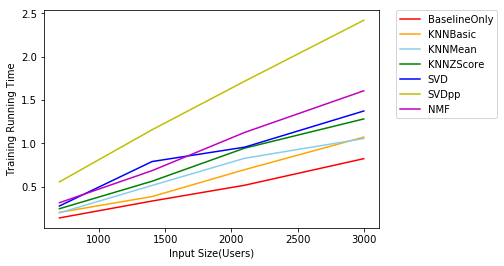

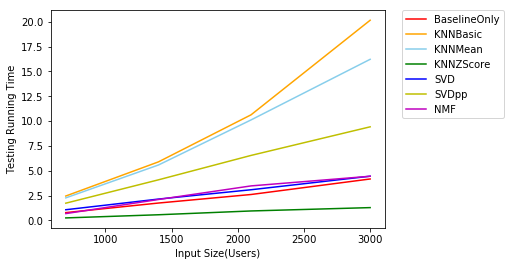

In [48]:
import matplotlib.pyplot as plt
users_N = [700, 1400, 2100, 3000]
plt.plot(users_N, elapsedtime_Basetrain, 'r', label = "BaselineOnly")
plt.plot(users_N, elapsedtime_KnnBasictrain, 'orange', label = "KNNBasic")
plt.plot(users_N, elapsedtime_KnnMeanstrain, 'skyblue', label = "KNNMean")
plt.plot(users_N, elapsedtime_KnnZtrain, 'g', label = "KNNZScore")
plt.plot( users_N, elapsedtime_SVDtrain,'b', label = "SVD")
plt.plot( users_N,elapsedtime_SVDpptrain, 'y', label = "SVDpp")
plt.plot( users_N,elapsedtime_NMFtrain, 'm', label = "NMF")

plt.ylabel('Training Running Time')
plt.xlabel('Input Size(Users)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

plt.plot(users_N, elapsedtime_Basetest, 'r', label = "BaselineOnly")
plt.plot(users_N, elapsedtime_KnnBasictest, 'orange', label = "KNNBasic")
plt.plot(users_N, elapsedtime_KnnMeanstest, 'skyblue', label = "KNNMean")
plt.plot(users_N, elapsedtime_KnnZtrain, 'g', label = "KNNZScore")
plt.plot( users_N, elapsedtime_SVDtest,'b', label = "SVD")
plt.plot( users_N,elapsedtime_SVDpptest, 'y', label = "SVDpp")
plt.plot( users_N,elapsedtime_NMFtest, 'm', label = "NMF")

plt.ylabel('Testing Running Time')
plt.xlabel('Input Size(Users)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()